In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Fourier transformations

- DFT naive
- IDFT naive
- Cooley-Tukey FFT (recursive)
- 1D cosine-time signals DFT

### DFT naive & IDFT naive

In [5]:
def dft(vector):
    n = vector.shape[0]
    s = np.exp(-2j*np.pi/n)
    F = np.array([
        [
            np.power(s, j*k) for k in range(n)
        ] for j in range(n)
    ])
    return F @ vector

def idft(x):
    return np.conj(dft(np.conj(x))) / x.shape[0]

def compare1():
    x = np.array([1, 2, 3, 4])
    y_dft = dft(x)
    y_idft = idft(y_dft)
    y_np = np.fft.fft(x)
    y_inv = np.fft.ifft(y_np)
    print(y_dft)
    print(y_np)
    print(y_idft)
    print(y_inv)
    print(np.allclose(y_dft, y_np))
    print(np.allclose(y_idft, y_inv))

compare1()

[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]
[1.-5.77996267e-16j 2.-2.60392190e-16j 3.-6.69535287e-17j
 4.+2.27765794e-16j]
[1.+0.j 2.+0.j 3.+0.j 4.+0.j]
True
True


### Cooley-Tukey FFT (recursive)

In [8]:
def recursive(n):
    if n == 2:
        return np.array([[1, 1],[1, -1]])
    S_n_2 = np.diag([np.exp(-2j*np.pi/n) ** i for i in range(n//2)])
    F_n_2 = recursive(n//2)

    A = F_n_2
    B = S_n_2 @ F_n_2
    C = F_n_2
    D = -S_n_2 @ F_n_2
    return np.concatenate((np.concatenate((A, C), axis=0),np.concatenate((B, D), axis=0)), axis=1)

def fft(vector):
    n = vector.shape[0]
    return recursive(n) @ vector

def compare2():
    x = np.array([1,3,3,4])
    y_fft = fft(x)
    y_np = np.fft.fft(x)
    print(y_fft)
    print(y_np)
    print(np.allclose(y_fft, y_np))

compare2()

[11.+0.j -2.+1.j -3.+0.j -2.-1.j]
[11.+0.j -2.+1.j -3.+0.j -2.-1.j]
True


### 1D cosine-time signals DFT

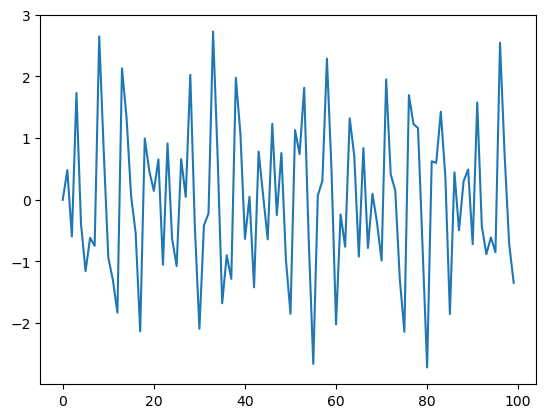

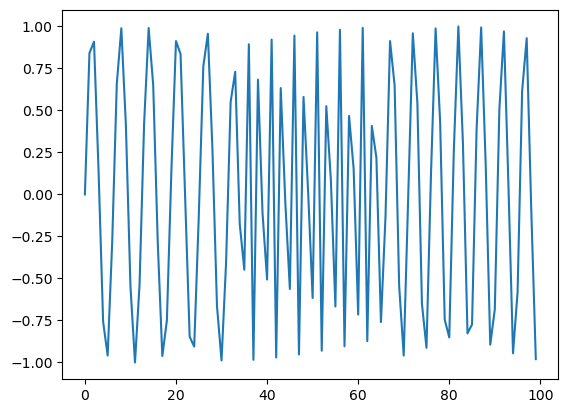

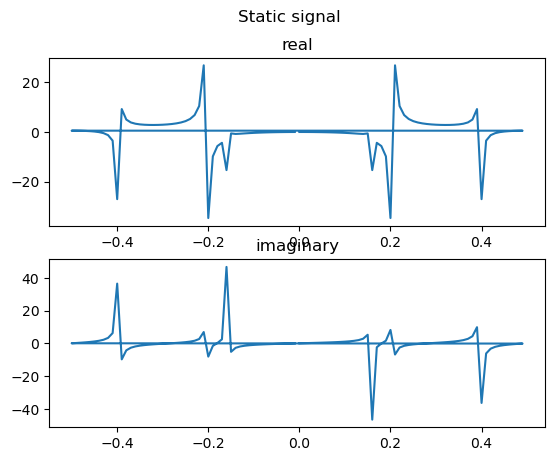

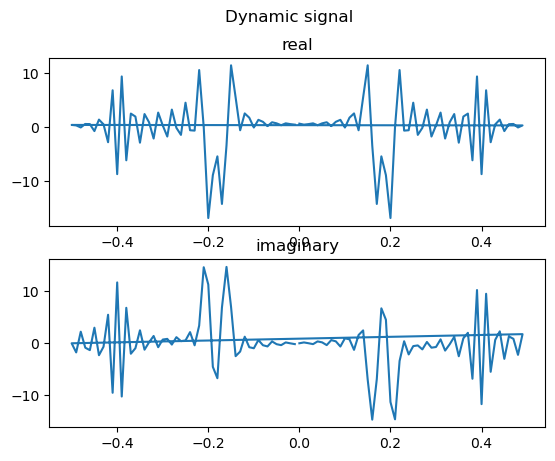

In [ ]:
n = 100
xs = np.arange(n)
freq = np.fft.fftfreq(n)  # sample frequencies

# 3 periodic functions with different frequencies
ys1 = np.sin(xs)
ys2 = np.sin(2.5*xs)
ys3 = np.sin(5*xs)

ys_static = ys1 + ys2 + ys3
ys_dyn = np.concatenate((ys1[:n//3], ys2[n//3:2*n//3], ys3[2*n//3:]))

plt.plot(xs, ys_static)
plt.show()
plt.plot(xs, ys_dyn)
plt.show()

def plot_complex(xs, ys, title):
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle(title)
    ax1.plot(xs, ys.real)
    ax1.set_title("real")
    ax2.plot(xs, ys.imag)
    ax2.set_title("imaginary")
    plt.show()


ys_static_f = np.fft.fft(ys_static)
plot_complex(freq, ys_static_f, 'Static signal')
ys_dyn_f = np.fft.fft(ys_dyn)
plot_complex(freq, ys_dyn_f, 'Dynamic signal')